In [1]:
%pylab inline
import prettysounds
import os
repo_dir = '/Users/Torben/Code/prettysounds/'

/Users/Torben/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
image_file = os.path.join(repo_dir,'dickbutt.jpg')
output_file = os.path.join(repo_dir,'dickbutt.mid')

reshaping image to 50x125


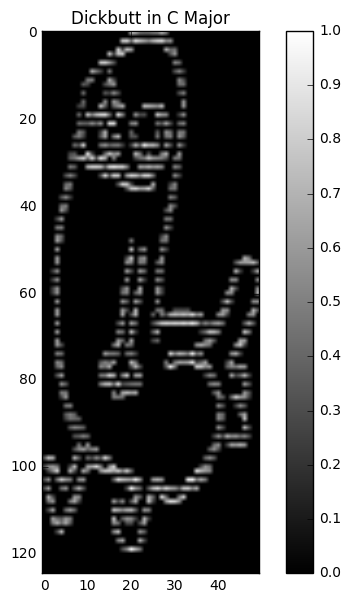

In [4]:
scale_template=np.asarray([0,2,4,5,7,9,11])
reshape_params=[50,125]
image_mat = prettysounds.preprocess_image(image_file,reshape_params=reshape_params)
music_mat = prettysounds.add_music(image_mat,scale_template=scale_template,method='round')

fig = prettysounds.plot_grayscale_img(image_mat,title='Dickbutt in C Major')
#prettysounds.matrix_to_midi(image_mat, first_note=0, tempo=250, output_file=output_file)

In [ ]:
# work in progress
# my_midi_file = '/Users/Torben/Code/prettysounds/bach_demo.mid'
# my_wav_file = '/Users/Torben/Code/prettysounds/jack.wav'
# fs = FluidSynth()
# fs.midi_to_audio(my_midi_file,my_wav_file)